In [1]:
import chess
from models.transformer.transformer import TransformerScore
from models.deep_engine import *

from src.chess.game_generator import GameGenerator
from src.chess.game import Game
from src.chess.puzzle import Puzzle
from src.chess.loader import Loader

In [2]:
print("Setup environment...")
model = TransformerScore()
model.load("./models/saves/TransformerScore-V4.auto-save.pth")

nb_batches = 8
batch_size = 16
epochs = 20
test_size = 128

ld_games = Loader(window=nb_batches, epochs_per_window=3, min_elo=1800).load(
    "data/lichess_db_standard_rated_2013-04.pgn.zst", 
    Game, 
    chunksize=batch_size
)

ld_puzzles = Loader(window=nb_batches, epochs_per_window=3).load(
    "data/lichess_db_puzzle.csv.zst", 
    Puzzle, 
    chunksize=batch_size
)

# ld_puzzles.skip(20 * 10)
# ld_games.skip(20 * 10)


Setup environment...


In [3]:
with model | generative_head | with_prints | auto_save as env:
    x = env.train(
        epochs=epochs, 
        batch_size=batch_size, 
        loader=ld_games | ld_puzzles
    )

    env.test(loader=ld_games | ld_puzzles)

    env.plot(x)


╭────────────────────────────────────────────────────────────────────────────────╮
| 🔄 TRAINING SESSION Engine: <TransformerScore>                                 |
| On <None> with <generative> head                                               |
|────────────────────────────────────────────────────────────────────────────────|
| >> Start training for 20 epochs                                                |
|  > Updating data                                                               |


| : 100%|█████████████████████████████████████| 256/256 [00:00<00:00, 8432.22it/s]


|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 122.56it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 507/507 [01:03<00:00,  8.04it/s]


|   [1/20] Loss: 7.19, Best Move Loss: 7.19, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 507/507 [01:02<00:00,  8.07it/s]


|   [2/20] Loss: 3.06, Best Move Loss: 3.06, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 507/507 [01:02<00:00,  8.05it/s]


|   [3/20] Loss: 2.05, Best Move Loss: 2.05, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 122.79it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 501/501 [00:55<00:00,  8.97it/s]


|   [4/20] Loss: 3.02, Best Move Loss: 3.02, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 501/501 [00:53<00:00,  9.44it/s]


|   [5/20] Loss: 2.01, Best Move Loss: 2.01, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 501/501 [00:52<00:00,  9.47it/s]


|   [6/20] Loss: 1.28, Best Move Loss: 1.28, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 121.21it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 503/503 [00:52<00:00,  9.58it/s]


|   [7/20] Loss: 2.86, Best Move Loss: 2.86, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 503/503 [00:52<00:00,  9.60it/s]


|   [8/20] Loss: 1.75, Best Move Loss: 1.75, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 503/503 [00:52<00:00,  9.57it/s]


|   [9/20] Loss: 1.03, Best Move Loss: 1.03, Contrastive loss 0.00               |
|   Legal Loss: 0.00                                                             |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:01<00:00, 146.52it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 471/471 [00:49<00:00,  9.44it/s]


|   [10/20] Loss: 2.84, Best Move Loss: 2.84, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 471/471 [00:49<00:00,  9.46it/s]


|   [11/20] Loss: 1.73, Best Move Loss: 1.73, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 471/471 [00:49<00:00,  9.47it/s]


|   [12/20] Loss: 1.02, Best Move Loss: 1.02, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 110.07it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 574/574 [00:59<00:00,  9.69it/s]


|   [13/20] Loss: 2.72, Best Move Loss: 2.72, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 574/574 [00:59<00:00,  9.73it/s]


|   [14/20] Loss: 1.59, Best Move Loss: 1.59, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 574/574 [00:59<00:00,  9.72it/s]


|   [15/20] Loss: 0.88, Best Move Loss: 0.87, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 126.67it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 522/522 [00:55<00:00,  9.46it/s]


|   [16/20] Loss: 2.78, Best Move Loss: 2.78, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 522/522 [00:55<00:00,  9.44it/s]


|   [17/20] Loss: 1.62, Best Move Loss: 1.62, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 522/522 [00:54<00:00,  9.50it/s]


|   [18/20] Loss: 0.90, Best Move Loss: 0.90, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 115.15it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 540/540 [00:57<00:00,  9.46it/s]


|   [19/20] Loss: 2.73, Best Move Loss: 2.73, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |


| : 100%|███████████████████████████████████████| 540/540 [00:56<00:00,  9.50it/s]


|   [20/20] Loss: 1.55, Best Move Loss: 1.55, Contrastive loss 0.00              |
|   Legal Loss: 0.00                                                             |
|                                                                                |
| >> Start testing                                                               |
|  > Updating data                                                               |


| : 100%|█████████████████████████████████████| 256/256 [00:00<00:00, 7866.18it/s]


|                                                                                |
|   Accuracy: 0.04                                                               |


|────────────────────────────────────────────────────────────────────────────────|
| ✅ Training session completed                                                  |
╰────────────────────────────────────────────────────────────────────────────────╯


╭────────────────────────────────────────────────────────────────────────────────╮
| 🔄 TRAINING SESSION Engine: <TransformerScore>                                 |
| On <None> with <board_evaluation> head                                         |
|────────────────────────────────────────────────────────────────────────────────|
| >> Start training for 20 epochs                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 121.95it/s]


|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 114.51it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 540/540 [00:12<00:00, 44.74it/s]


|   [1/20] Loss: 0.53, Contrastive Loss: 2.26,                                   |
|   Classification Loss: 0.19                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 540/540 [00:12<00:00, 44.38it/s]


|   [2/20] Loss: 0.41, Contrastive Loss: 2.00,                                   |
|   Classification Loss: 0.11                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 540/540 [00:11<00:00, 45.02it/s]


|   [3/20] Loss: 0.36, Contrastive Loss: 1.91,                                   |
|   Classification Loss: 0.07                                                    |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 120.58it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 556/556 [00:12<00:00, 44.89it/s]


|   [4/20] Loss: 0.50, Contrastive Loss: 2.13,                                   |
|   Classification Loss: 0.18                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 556/556 [00:12<00:00, 44.59it/s]


|   [5/20] Loss: 0.40, Contrastive Loss: 1.95,                                   |
|   Classification Loss: 0.10                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 556/556 [00:12<00:00, 44.46it/s]


|   [6/20] Loss: 0.36, Contrastive Loss: 1.89,                                   |
|   Classification Loss: 0.07                                                    |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:01<00:00, 131.84it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 511/511 [00:11<00:00, 45.06it/s]


|   [7/20] Loss: 0.49, Contrastive Loss: 2.15,                                   |
|   Classification Loss: 0.17                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 511/511 [00:11<00:00, 44.62it/s]


|   [8/20] Loss: 0.38, Contrastive Loss: 1.92,                                   |
|   Classification Loss: 0.10                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 511/511 [00:11<00:00, 44.68it/s]


|   [9/20] Loss: 0.35, Contrastive Loss: 1.87,                                   |
|   Classification Loss: 0.07                                                    |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 114.18it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 502/502 [00:11<00:00, 44.69it/s]


|   [10/20] Loss: 0.49, Contrastive Loss: 2.12,                                  |
|   Classification Loss: 0.17                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 502/502 [00:11<00:00, 44.15it/s]


|   [11/20] Loss: 0.39, Contrastive Loss: 1.94,                                  |
|   Classification Loss: 0.10                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 502/502 [00:11<00:00, 45.34it/s]


|   [12/20] Loss: 0.35, Contrastive Loss: 1.87,                                  |
|   Classification Loss: 0.07                                                    |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:02<00:00, 127.19it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 503/503 [00:11<00:00, 44.74it/s]


|   [13/20] Loss: 0.49, Contrastive Loss: 2.11,                                  |
|   Classification Loss: 0.17                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 503/503 [00:11<00:00, 45.36it/s]


|   [14/20] Loss: 0.39, Contrastive Loss: 1.92,                                  |
|   Classification Loss: 0.10                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 503/503 [00:11<00:00, 45.00it/s]


|   [15/20] Loss: 0.35, Contrastive Loss: 1.88,                                  |
|   Classification Loss: 0.07                                                    |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:01<00:00, 140.51it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 476/476 [00:10<00:00, 45.41it/s]


|   [16/20] Loss: 0.52, Contrastive Loss: 2.22,                                  |
|   Classification Loss: 0.19                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 476/476 [00:10<00:00, 44.94it/s]


|   [17/20] Loss: 0.40, Contrastive Loss: 1.94,                                  |
|   Classification Loss: 0.11                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 476/476 [00:10<00:00, 44.58it/s]


|   [18/20] Loss: 0.36, Contrastive Loss: 1.88,                                  |
|   Classification Loss: 0.08                                                    |
|                                                                                |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:01<00:00, 136.67it/s]


|                                                                                |


| : 100%|███████████████████████████████████████| 483/483 [00:10<00:00, 45.02it/s]


|   [19/20] Loss: 0.51, Contrastive Loss: 2.14,                                  |
|   Classification Loss: 0.19                                                    |
|                                                                                |


| : 100%|███████████████████████████████████████| 483/483 [00:10<00:00, 44.37it/s]


|   [20/20] Loss: 0.40, Contrastive Loss: 1.96,                                  |
|   Classification Loss: 0.10                                                    |
|                                                                                |
| >> Start testing                                                               |
|  > Updating data                                                               |


| : 100%|██████████████████████████████████████| 256/256 [00:01<00:00, 139.60it/s]


|                                                                                |
|   Accuracy: 0.52                                                               |


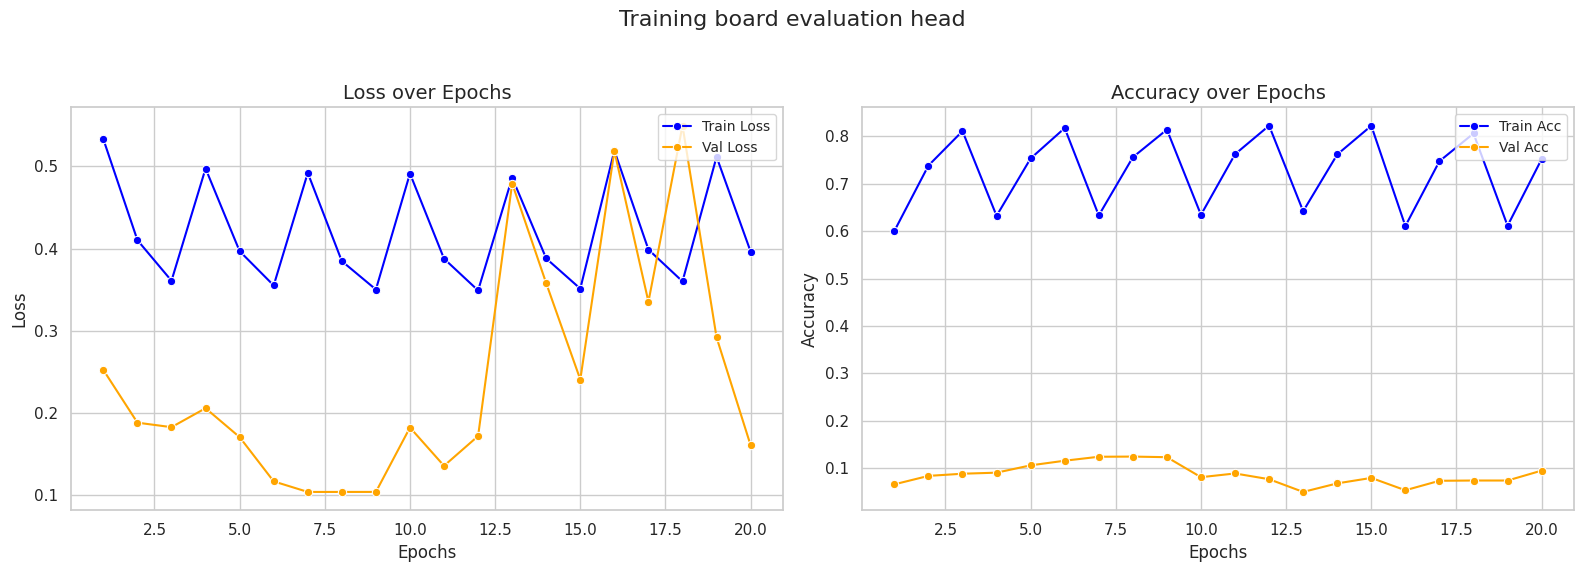

|────────────────────────────────────────────────────────────────────────────────|
| ✅ Training session completed                                                  |
╰────────────────────────────────────────────────────────────────────────────────╯


In [4]:

with model | board_evaluation_head | with_prints | auto_save as env:
    X = env.train(
        epochs=epochs, 
        batch_size=batch_size, 
        loader=ld_games | ld_puzzles
    )

    env.test(loader=ld_games | ld_puzzles)

    env.plot(X)
